<a href="https://colab.research.google.com/github/Sohail1173/resume_classifier/blob/main/resume_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   It is good practice to connect google colab with drive,you can share your Jupyter Notebooks very efficiently anywhere.But the problem arises when we have to work with huge Dataset, As google colab
also provides many ways to upload your data to its Virtual Machine on which your code is running. But as soon as you got disconnected all of your Data is lost when you reconnect to new Virtual Machine that is offered to you.


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive






*   Importing the required





In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from keras.utils import plot_model
import os



*   Loading the datasets


In [ ]:
train_path="/content/drive/MyDrive/custom_data/train"
val_path="/content/drive/MyDrive/custom_data/val"
test_path="/content/drive/MyDrive/custom_data/test"

After loading the datasets, we proceed with data preprocessing steps. As we know, the shape of our dataset's images is 640, but our model expects the data shape to be 224.

In [ ]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [ ]:
print(x_train)
print(x_test)
print(x_val)

[array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]

After loading the images into lists (x_train, x_test, and x_val), the code converts these lists into NumPy arrays using the np.array() function.Now, train_x, test_x, and val_x are NumPy arrays containing the image data. Each array represents a set of images (training, testing, and validation sets) with their corresponding resized image arrays.

In [ ]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [ ]:
print(train_x)
print(test_x)
print(val_x)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[103  39   5]
   [103  39   5]
   [103  39   5]
   ...
   [103  39   5]
   [103  39   5]
   [103  39   5]]

  [[102  38   4]
   [102  38   4]
   [102  38   4]
   ...
   [102  38   4]
   [102  38   4]
   [102  38   4]]

  [[104  39   6]
   [104  39   6]
   [104  39   6]
   ...
   [104  39   6]
   [104  39   6]
   [104  39

Next normalizes the pixel values of the image data.The division by 255.0 scales the pixel values of the images. The reason for choosing 255 is that pixel values in typical images are in the range of 0 to 255 for each channel (in the case of RGB images). Dividing by 255 scales these values to the range between 0 and 1. This normalization is often done to ensure that the input features are on a similar scale, which can help in training machine learning models more effectively.

In [ ]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

At last, let us compute the labels of the corresponding datasets using ImageDataGenerator.This is used because our images are stored in folders. We must walk through the folders and find out the corresponding labels of the images stored here.

Labels in this case are nothing but rock, paper, and scissors

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'binary')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'binary')

Found 2162 images belonging to 2 classes.
Found 52 images belonging to 2 classes.
Found 97 images belonging to 2 classes.


It can be clearly noted that out of 2311 images,2162 images are used to train our model while 52 images are completely unseen and hence are used to test our model and 97 images are used to validate our model during the training.

> Indented block



In [ ]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [ ]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape

((2162,), (52,), (97,))

#Model training:
We will be utilizing the pretrained model,we are not training from scratch.One of the main advantages of pretrained models is transfer learning. Pretrained models, trained on large and diverse datasets, have already learned rich hierarchical features that can be valuable for a wide range of tasks. By using a pretrained model as a starting point, you can transfer this knowledge to a new, possibly smaller, dataset for a specific task. This is particularly useful when you have limited labeled data for your target task.

The pretrained model we will be utilizing the vgg19 for classification.VGG19 is a convolutional neural network architecture that belongs to the VGG (Visual Geometry Group) family. It was introduced by the Visual Geometry Group at the University of Oxford. VGG19 is an extension of the original VGG16 architecture, and both are widely used for image classification tasks.

In [ ]:
vgg = VGG19(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

80134624/80134624 [==============================] - 0s 0us/step


Now, to customize the model, we have to change its last layer alone according to the number of classes in our problem. As we have only 2 categories,

In [ ]:
x = Flatten()(vgg.output)
#adding output layer.Sigmoid classifier is used as it is for  binary classification
prediction = Dense(1, activation='sigmoid')(x)

model = Model(inputs=vgg.input, outputs=prediction)
# Finally, our model can be summarized using:

# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [ ]:
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=50,
  callbacks=[early_stop],
  batch_size=16,shuffle=True)

Epoch 1/50
136/136 [==============================] - 13s 88ms/step - loss: 0.3507 - accuracy: 0.8710 - val_loss: 0.1951 - val_accuracy: 0.9278
Epoch 2/50
136/136 [==============================] - 12s 85ms/step - loss: 0.2115 - accuracy: 0.9274 - val_loss: 0.2196 - val_accuracy: 0.9588
Epoch 3/50
136/136 [==============================] - 12s 85ms/step - loss: 0.1842 - accuracy: 0.9348 - val_loss: 0.1846 - val_accuracy: 0.9485
Epoch 4/50
136/136 [==============================] - 12s 85ms/step - loss: 0.1541 - accuracy: 0.9463 - val_loss: 0.3078 - val_accuracy: 0.9485
Epoch 5/50
136/136 [==============================] - 12s 85ms/step - loss: 0.1530 - accuracy: 0.9468 - val_loss: 0.2773 - val_accuracy: 0.9588
Epoch 6/50
136/136 [==============================] - 12s 87ms/step - loss: 0.1322 - accuracy: 0.9542 - val_loss: 0.4766 - val_accuracy: 0.9072
Epoch 7/50
136/136 [==============================] - 11s 83ms/step - loss: 0.1262 - accuracy: 0.9547 - val_loss: 0.3117 - val_accuracy:

Saving the trained model allows you to persist the model's architecture, weights, and configuration. This is crucial if you want to reuse the trained model later without retraining it from scratch. It enables you to save the state of your model and use it for making predictions or further fine-tuning.

In [ ]:
model.save('/content/drive/MyDrive/custom_data/model4.h5')

In [ ]:
from tensorflow.keras.models import load_model

# load model
model = load_model('/content/drive/MyDrive/custom_data/model4.h5')

The performance of our model on training and validation datasets can be visualized with the help of accuracy and loss graphs as follows

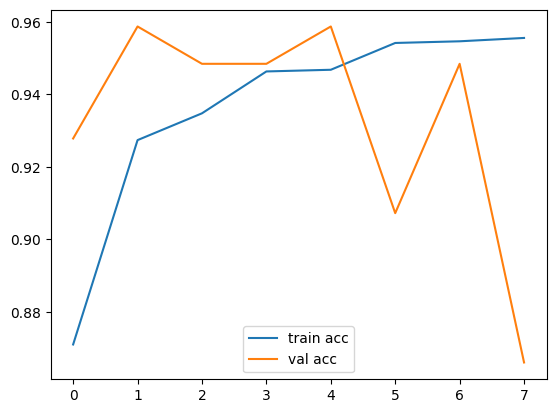

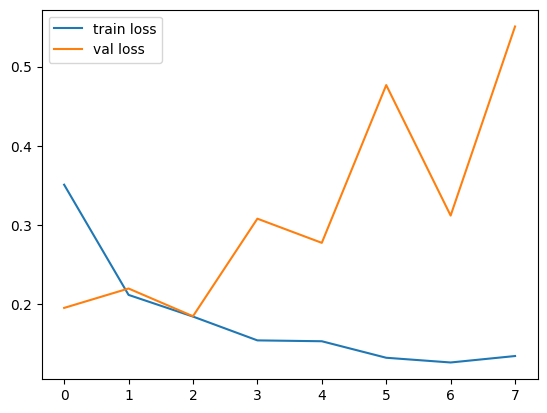

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()


In [ ]:
model.evaluate(test_x,test_y,batch_size=16)


4/4 [==============================] - 3s 1s/step - loss: 6.9991 - accuracy: 0.2115


[6.999117374420166, 0.21153846383094788]

Our model shows a testing accuracy of 21% and its testing time is 3 seconds for 52 images.

However, to consider our deep learning model as good and efficient, it is insufficient to solely focus on its accuracy. While our model exhibits high accuracy on the training data, it struggles to achieve comparable accuracy on the test data. This suggests that our model is not effectively learning the underlying patterns of the data and is prone to overfitting.

Addressing overfitting and improving the generalization performance of our model can involve several strategies. Here are some suggestions:


1.   Increase Dataset Size
2.   Data Preprocessing
1.   Cross-Validation
2.   Hyperparameter Tuning etc





In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
#get classification report
print(classification_report(y_pred,test_y))
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

2/2 [==============================] - 12s 5s/step
              precision    recall  f1-score   support

           0       1.00      0.38      0.56        52
           1       0.00      0.00      0.00         0

    accuracy                           0.38        52
   macro avg       0.50      0.19      0.28        52
weighted avg       1.00      0.38      0.56        52

[[20 32]
 [ 0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The report says:


1.   Precision: Precision is the ratio of correctly predicted positive
     observations to the total predicted positives. In this report, for class 0, precision is 1.00 (100%), indicating that all instances predicted as class 0 are correct. For class 1, precision is 0.00 (0%), suggesting that the model did not correctly predict any instances for class 1.

2.   Recall: Recall, or sensitivity, is the ratio of correctly    predicted         positive observations to the total actual positives. For class 0, recall is 0.38 (38%), indicating that only 38% of actual instances of class 0 were correctly predicted. For class 1, recall is 0.00 (0%), meaning that the model did not correctly predict any instances for class 1.


3.   F1-Score: The F1-Score is the harmonic mean of precision and recall. It
     provides a balance between precision and recall. The F1-score for class 0 is 0.56.

4.   Support: The number of actual occurrences of the class in the specified dataset. For class 0, the support is 52, and for class 1, it is 0.

5.   Accuracy: Overall accuracy of the model is 0.38 (38%), indicating that the
     model correctly predicted the class for 38% of the instances.





The confusion matrix says:

The confusion matrix provided is a 2x2 matrix that summarizes the performance of a classification algorithm. Each row of the matrix represents the instances in an actual class, while each column represents the instances in a predicted class.

So, in summary:

1.True Positives (TP): 20

2.False Positives (FP): 32

3.False Negatives (FN): 0

4.True Negatives (TN): 0

This confusion matrix indicates that the model correctly predicted 20 instances of class 0 and incorrectly predicted 32 instances of class 0 as class 1. There are no predictions for class 1, which may indicate a potential issue with the model or the dataset for class 1